In [229]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Load the data
fish_data = pd.read_excel("Fish Weight-3Only.xlsx")

# Check for missing data
fish_data.isnull().sum()

# One-hot encoding

dummy_species = pd.get_dummies(fish_data['Species'], prefix='', prefix_sep='')
fish_data_encoded = pd.concat([fish_data, dummy_species], axis=1)
fish_data_encoded.drop('Species', axis=1, inplace=True)

# Split data into train and test sets for each species
train_bream, test_bream = train_test_split(fish_data_encoded[fish_data_encoded['Bream'] == 1], test_size=0.2,random_state=42)
train_roach, test_roach = train_test_split(fish_data_encoded[fish_data_encoded['Roach'] == 1], test_size=0.2,random_state=42)
train_perch, test_perch = train_test_split(fish_data_encoded[fish_data_encoded['Perch'] == 1], test_size=0.2,random_state=42)

# Combine train sets for all species
train_data = pd.concat([train_bream, train_roach, train_perch], axis=0)

# Build the linear regression model
X_train = train_data[['Height','Length1','Length2','Length3','Width', 'Bream', 'Roach', 'Perch']]
y_train = train_data['Weight']
shuffled_X_train = X_train.sample(frac=1, random_state=42)
shuffled_y_train = y_train.sample(frac=1, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Model formula
formula = 'Weight = {:.2f}  + {:.2f}*Height + {:.2f}*Length1 + {:.2f}*Length2  + {:.2f}*Length3 + {:.2f}*Width +  {:.2f}*Bream + {:.2f}*Roach + {:.2f}*Perch '.format(lin_reg.intercept_, lin_reg.coef_[0], lin_reg.coef_[1], lin_reg.coef_[2], lin_reg.coef_[3], lin_reg.coef_[4], lin_reg.coef_[5], lin_reg.coef_[6], lin_reg.coef_[7])

print(formula)

# Evaluate the model on the training set
y_train_pred = lin_reg.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
print('Training set R-squared: {:.2f}'.format(r2_train))
print('Training set RMSE: {:.2f}'.format(rmse_train))
print('Training set MSE: {:.2f}'.format(mse_train))
print('Training set MAE: {:.2f}'.format(mae_train))

# Evaluate the model on the test set
X_test = pd.concat([test_bream, test_roach, test_perch], axis=0)[['Height','Length1','Length2','Length3','Width', 'Bream', 'Roach', 'Perch']]
y_test = pd.concat([test_bream, test_roach, test_perch], axis=0)['Weight']
y_test_pred = lin_reg.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print('Test set R-squared: {:.2f}'.format(r2_test))
print('Test set RMSE: {:.2f}'.format(rmse_test))
print('Test set MSE: {:.2f}'.format(mse_test))
print('Test set MAE: {:.2f}'.format(mae_test))



Weight = -763.09  + 56.44*Height + -27.06*Length1 + 26.84*Length2  + 11.73*Length3 + 36.06*Width +  -187.16*Bream + 62.39*Roach + 124.77*Perch 
Training set R-squared: 0.96
Training set RMSE: 62.96
Training set MSE: 3964.31
Training set MAE: 49.20
Test set R-squared: 0.90
Test set RMSE: 105.29
Test set MSE: 11086.98
Test set MAE: 71.80


In [218]:
# Split data into train and test sets for each species
train_bream, test_bream = train_test_split(fish_data_encoded[fish_data_encoded['Bream'] == 1], test_size=0.2)
train_roach, test_roach = train_test_split(fish_data_encoded[fish_data_encoded['Roach'] == 1], test_size=0.2)
train_perch, test_perch = train_test_split(fish_data_encoded[fish_data_encoded['Perch'] == 1], test_size=0.2)

# Combine train sets for all species
train_data = pd.concat([train_bream, train_roach, train_perch], axis=0)

# trying to create data myself
train_data['L_mean'] = (train_data['Length1']+train_data['Length2']+train_data['Length3'])/3
train_data['volume'] = train_data['L_mean']*train_data['Height']*train_data['Width']
train_data

# Build the linear regression model
X_train = train_data[['volume', 'Bream', 'Roach', 'Perch']]
y_train = train_data['Weight']
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Model formula
formula = 'Weight = {:.2f} + {:.2f}*volume + {:.2f}*Bream_D + {:.2f}*Roach_D + {:.2f}*Perch_D'.format(lin_reg.intercept_, lin_reg.coef_[0], lin_reg.coef_[1], lin_reg.coef_[2], lin_reg.coef_[3])
print(formula)

# Evaluate the model on the training set
y_train_pred = lin_reg.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('Training set R-squared: {:.2f}'.format(r2_train))
print('Training set RMSE: {:.2f}'.format(rmse_train))

# Evaluate the model on the test set
X_test = pd.concat([test_bream, test_roach, test_perch], axis=0)[['Height','Length1','Length2','Length3','Width', 'Bream', 'Roach', 'Perch']]
X_test['L_mean']= (X_test['Length1']+X_test['Length2']+X_test['Length3'])/3
X_test['volume'] = X_test['L_mean']*X_test['Height']*X_test['Width']
y_test = pd.concat([test_bream, test_roach, test_perch], axis=0)['Weight']
y_test_pred = lin_reg.predict( X_test[['volume', 'Bream', 'Roach', 'Perch']])
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('Test set R-squared: {:.2f}'.format(r2_test))
print('Test set RMSE: {:.2f}'.format(rmse_test))

Weight = -7.51 + 0.23*volume + -66.29*Bream_D + 16.20*Roach_D + 50.09*Perch_D
Training set R-squared: 0.97
Training set RMSE: 55.68
Test set R-squared: 0.96
Test set RMSE: 62.64


In [122]:
# fish_data_encoded['L_mean'] = (fish_data_encoded['Length1']+fish_data_encoded['Length2']+fish_data_encoded['Length3'])/3
# fish_data_encoded['volume'] = fish_data_encoded['L_mean']*fish_data_encoded['Height']*fish_data_encoded['Width']
# fish_data_encoded


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load the data
fish_data = pd.read_excel("Fish Weight-3Only.xlsx")

# One-hot encoding

dummy_species = pd.get_dummies(fish_data['Species'], prefix='', prefix_sep='')
fish_data_encoded = pd.concat([fish_data, dummy_species], axis=1)
fish_data_encoded.drop('Species', axis=1, inplace=True)

# trying to create data myself
fish_data_encoded['L_mean'] = (fish_data_encoded['Length1']+fish_data_encoded['Length2']+fish_data_encoded['Length3'])/3
fish_data_encoded['volume'] = fish_data_encoded['L_mean']*fish_data_encoded['Height']*fish_data_encoded['Width']
# print(fish_data_encoded.head(3))

# Split data into train and test sets for each species
train_bream, test_bream = train_test_split(fish_data_encoded[fish_data_encoded['Bream'] == 1], test_size=0.2)
train_roach, test_roach = train_test_split(fish_data_encoded[fish_data_encoded['Roach'] == 1], test_size=0.2)
train_perch, test_perch = train_test_split(fish_data_encoded[fish_data_encoded['Perch'] == 1], test_size=0.2)

# Combine train sets for all species
train_data = pd.concat([train_bream, train_roach, train_perch], axis=0)

# Build the linear regression model
X_train = train_data[['Height','L_mean','volume','Length1','Length2','Length3','Width', 'Bream', 'Roach', 'Perch']]
y_train = train_data['Weight']
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Model formula
formula = 'Weight = {:.2f}  + {:.2f}*L_mean + {:.2f}*volume + {:.2f}*Height  + {:.2f}*Length1 + {:.2f}*Length2 + {:.2f}*Length3+ {:.2f}*Width + {:.2f}*Bream_D + {:.2f}*Roach_D + {:.2f}*Perch_D'.format(lin_reg.intercept_, lin_reg.coef_[0], lin_reg.coef_[1], lin_reg.coef_[2], lin_reg.coef_[3], lin_reg.coef_[4], lin_reg.coef_[5], lin_reg.coef_[6], lin_reg.coef_[7], lin_reg.coef_[8], lin_reg.coef_[9])
print(formula)

# Evaluate the model on the training set
y_train_pred = lin_reg.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('Training set R-squared: {:.2f}'.format(r2_train))
print('Training set RMSE: {:.2f}'.format(rmse_train))

# Evaluate the model on the test set
X_test = pd.concat([test_bream, test_roach, test_perch], axis=0)[['Height','L_mean','volume','Length1','Length2','Length3','Width', 'Bream', 'Roach', 'Perch']]
y_test = pd.concat([test_bream, test_roach, test_perch], axis=0)['Weight']

y_test_pred = lin_reg.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('Test set R-squared: {:.2f}'.format(r2_test))
print('Test set RMSE: {:.2f}'.format(rmse_test))


Weight = -166.16  + -6.68*L_mean + 3.00*volume + 0.18*Height  + 44.28*Length1 + -47.58*Length2 + 12.31*Length3+ 9.90*Width + -31.92*Bream_D + -3.12*Roach_D + 35.04*Perch_D
Training set R-squared: 0.97
Training set RMSE: 49.33
Test set R-squared: 0.98
Test set RMSE: 46.13


In [12]:
# trying to shuffle training data

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle


# Load the data
fish_data = pd.read_excel("Fish Weight-3Only.xlsx")

# One-hot encoding

dummy_species = pd.get_dummies(fish_data['Species'], prefix='', prefix_sep='')
fish_data_encoded = pd.concat([fish_data, dummy_species], axis=1)
fish_data_encoded.drop('Species', axis=1, inplace=True)
#####################################
# trying to create data myself
fish_data_encoded['L_mean'] = (fish_data_encoded['Length1']+fish_data_encoded['Length2']+fish_data_encoded['Length3'])/3
fish_data_encoded['volume'] = fish_data_encoded['L_mean']*fish_data_encoded['Height']*fish_data_encoded['Width']
# print(fish_data_encoded.head(3))
##################################
# Split data into train and test sets for each species
train_bream, test_bream = train_test_split(fish_data_encoded[fish_data_encoded['Bream'] == 1], test_size=0.2)
train_roach, test_roach = train_test_split(fish_data_encoded[fish_data_encoded['Roach'] == 1], test_size=0.2)
train_perch, test_perch = train_test_split(fish_data_encoded[fish_data_encoded['Perch'] == 1], test_size=0.2)

# Combine train sets for all species
train_data = pd.concat([train_bream, train_roach, train_perch], axis=0)
train_data = shuffle(train_data, random_state=42)

# Build the linear regression model
X_train = train_data[['Height','L_mean','volume','Length1','Length2','Length3','Width', 'Bream', 'Roach', 'Perch']]
y_train = train_data['Weight']
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Model formula
formula = 'Weight = {:.2f}  + {:.2f}*L_mean + {:.2f}*volume + {:.2f}*Height  + {:.2f}*Length1 + {:.2f}*Length2 + {:.2f}*Length3+ {:.2f}*Width + {:.2f}*Bream_D + {:.2f}*Roach_D + {:.2f}*Perch_D'.format(lin_reg.intercept_, lin_reg.coef_[0], lin_reg.coef_[1], lin_reg.coef_[2], lin_reg.coef_[3], lin_reg.coef_[4], lin_reg.coef_[5], lin_reg.coef_[6], lin_reg.coef_[7], lin_reg.coef_[8], lin_reg.coef_[9])
print(formula)

# Evaluate the model on the training set
y_train_pred = lin_reg.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('Training set R-squared: {:.2f}'.format(r2_train))
print('Training set RMSE: {:.2f}'.format(rmse_train))

# Evaluate the model on the test set
X_test = pd.concat([test_bream, test_roach, test_perch], axis=0)[['Height','L_mean','volume','Length1','Length2','Length3','Width', 'Bream', 'Roach', 'Perch']]
y_test = pd.concat([test_bream, test_roach, test_perch], axis=0)['Weight']

y_test_pred = lin_reg.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('Test set R-squared: {:.2f}'.format(r2_test))
print('Test set RMSE: {:.2f}'.format(rmse_test))


Weight = -180.27  + -2.55*L_mean + 2.13*volume + 0.18*Height  + 39.87*Length1 + -48.31*Length2 + 14.82*Length3+ 18.85*Width + -57.64*Bream_D + 0.27*Roach_D + 57.38*Perch_D
Training set R-squared: 0.98
Training set RMSE: 49.39
Test set R-squared: 0.97
Test set RMSE: 45.19


In [332]:
con_data = pd.read_excel("Concrete-Homework.xlsx")
con_data.drop('Unnamed: 0',axis = 1,inplace = True)

In [333]:
con_data.isnull().any()



Cement                  True
BlastFurnaceSlag       False
FlyAsh                 False
Water                   True
Superplasticizer        True
CoarseAggregate        False
FineAggregate          False
Age                    False
CompressiveStrength    False
dtype: bool

In [334]:
con_data.dropna(axis = 0,inplace =True)

In [335]:
con_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1030 entries, 0 to 1031
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1030 non-null   float64
 1   BlastFurnaceSlag     1030 non-null   float64
 2   FlyAsh               1030 non-null   float64
 3   Water                1030 non-null   float64
 4   Superplasticizer     1030 non-null   float64
 5   CoarseAggregate      1030 non-null   float64
 6   FineAggregate        1030 non-null   float64
 7   Age                  1030 non-null   float64
 8   CompressiveStrength  1030 non-null   float64
dtypes: float64(9)
memory usage: 80.5 KB


Text(0.5, 1.0, 'Age')

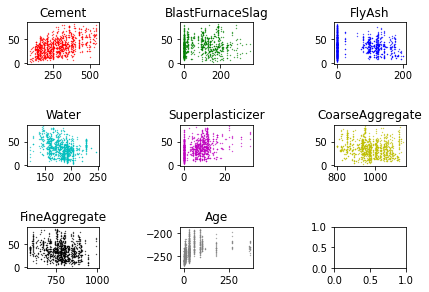

In [262]:
fig, axs = plt.subplots(3,3)
fig.tight_layout(h_pad=4,w_pad =5)
axs[0,0].scatter(con_data['Cement'],con_data['CompressiveStrength'], c ='r',s=0.1)
axs[0,0].set_title('Cement')
axs[0,1].scatter(con_data['BlastFurnaceSlag'],con_data['CompressiveStrength'],c ='g',s=0.1)
axs[0,1].set_title('BlastFurnaceSlag')
axs[0,2].scatter(con_data['FlyAsh'],con_data['CompressiveStrength'],c ='b',s=0.1)
axs[0,2].set_title('FlyAsh')
axs[1,0].scatter(con_data['Water'],con_data['CompressiveStrength'],c ='c',s=0.1)
axs[1,0].set_title('Water')
axs[1,1].scatter(con_data['Superplasticizer'],con_data['CompressiveStrength'],c ='m',s=0.1)
axs[1,1].set_title('Superplasticizer')
axs[1,2].scatter(con_data['CoarseAggregate'],con_data['CompressiveStrength'],c ='y',s=0.1)
axs[1,2].set_title('CoarseAggregate')
axs[2,0].scatter(con_data['FineAggregate'],con_data['CompressiveStrength'],c ='k',s=0.1)
axs[2,0].set_title('FineAggregate')
axs[2,1].scatter(con_data['Age'],con_data['CompressiveStrength']-273.15,c ='grey',s=0.1)
axs[2,1].set_title('Age')
# axs[2,2].plot(con_data[''],con_data['CompressiveStrength'],c ='k')
# axs[2,2].set_title('Pressure')
# for ax in axs.flat:
#     ax.set(xlabel='Cat.Wt(kg)',ylabel='Flowrate(kmol/h)')
# axs[2, 1].set_ylabel('T(°C)')
# axs[2, 2].set_ylabel('P(bar)')

Text(0, 0.5, 'Sales')

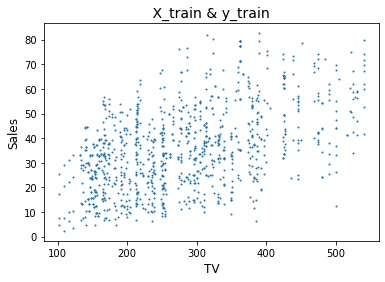

In [331]:
# observing the relationship of TV and Sales roughly in scatter plot
plt.scatter(con_data['Cement'],con_data['CompressiveStrength'], s=1)
plt.title(' X_train & y_train ', fontsize=14)
plt.xlabel('TV', fontsize=12);
plt.ylabel('Sales', fontsize=12)

In [375]:
con_data['Aggregate'] = (con_data['FineAggregate']+con_data['CoarseAggregate'])/2
con_data['BFW'] = (con_data['BlastFurnaceSlag']+con_data['FlyAsh']+con_data['Water'])
con_data['CS'] = (con_data['BlastFurnaceSlag']**con_data['Superplasticizer'])

con_data.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength,Aggregate,BFW
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99,858.00,162.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89,865.50,162.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.27,763.00,370.5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05,763.00,370.5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30,901.95,324.4


In [34]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


con_data_clean = con_data[con_data['FlyAsh'] != 0]
con_data_clean['Aggregate'] = (con_data_clean['Cement']+con_data['CoarseAggregate'])/2

# Example of creating new features by taking the square root of numerical features
con_data_clean['Sqrt_Cement'] = np.sqrt(con_data_clean['Cement'])
con_data_clean['Sqrt_Water'] = np.sqrt(con_data_clean['Water'])


# Separate the target variable from the features
X = con_data_clean[['BlastFurnaceSlag','Sqrt_Cement','Sqrt_Water','Cement','FlyAsh','Water','Superplasticizer','Aggregate','Age']]
y = con_data_clean['CompressiveStrength']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit a linear regression model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

print('Training set R-squared: {:.2f}'.format(r2_train))
print('Training set RMSE: {:.2f}'.format(rmse_train))
# Evaluate the performance of the model on the test set
y_pred = model.predict(X_test)
rmse =  np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print('RMSE:', rmse)
print('R-squared:', r2)
print('Features:' ,  X.columns)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Training set R-squared: 0.74
Training set RMSE: 7.26
RMSE: 6.4800862595496325
R-squared: 0.7668733736277312
Features: Index(['BlastFurnaceSlag', 'Sqrt_Cement', 'Sqrt_Water', 'Cement', 'FlyAsh',
       'Water', 'Superplasticizer', 'Aggregate', 'Age'],
      dtype='object')
Coefficients: [ 0.11609597 10.25358985 -0.08531292 -0.1975195   0.05178123 -0.18299837
 -0.08438694  0.01074507  0.30971248]
Intercept: -68.91785549711207


C:\Users\USER\AppData\Local\Temp\ipykernel_15744\806867121.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  con_data_clean['Aggregate'] = (con_data_clean['Cement']+con_data['CoarseAggregate'])/2
C:\Users\USER\AppData\Local\Temp\ipykernel_15744\806867121.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  con_data_clean['Sqrt_Cement'] = np.sqrt(con_data_clean['Cement'])
C:\Users\USER\AppData\Local\Temp\ipykernel_15744\806867121.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

# dicision tree regressor


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset into a pandas DataFrame
con_data = pd.read_excel("Concrete-Homework.xlsx")
con_data.drop('Unnamed: 0',axis = 1,inplace = True)
con_data.dropna(axis = 0,inplace =True)

con_data_clean = con_data[con_data['FlyAsh'] != 0]
con_data_clean['Aggregate'] = (con_data_clean['FineAggregate']+con_data['CoarseAggregate'])/2
con_data_clean['Sqrt_Cement'] = np.sqrt(con_data_clean['Cement'])
con_data_clean['Sqrt_Water'] = np.sqrt(con_data_clean['Water'])


# Separate the target variable from the features
X = con_data_clean[['BlastFurnaceSlag','Sqrt_Cement','Sqrt_Water','Cement','FlyAsh','CoarseAggregate','FineAggregate','Water','Superplasticizer','Aggregate','Age']]
y = con_data_clean['CompressiveStrength']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a decision tree regression model to the training data
for num in range(20):
    model = DecisionTreeRegressor(max_depth=num+1 )
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    # Evaluate the performance of the model on the test set
    print('max_depth:', num+1)
   
    
    print('')
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Print the performance metrics
    print('Train_RMSE:', train_rmse)
    print('Test_RMSE:', rmse)
    print('Train_R-squared:', train_r2)
    print('R-squared:', r2)
    print('=========')


max_depth: 1

Train_RMSE: 12.205137758900792
Test_RMSE: 12.250123908144262
Train_R-squared: 0.27926964758359984
R-squared: 0.1668728874023757
max_depth: 2

Train_RMSE: 10.101897932741586
Test_RMSE: 10.001573018389935
Train_R-squared: 0.5062655929058548
R-squared: 0.44464980995239123
max_depth: 3

Train_RMSE: 8.632230404434958
Test_RMSE: 7.974214823153765
Train_R-squared: 0.6394765751174811
R-squared: 0.6469744263200748
max_depth: 4

Train_RMSE: 7.431759503621177
Test_RMSE: 8.020766789339309
Train_R-squared: 0.7327789075608493
R-squared: 0.642840601401788
max_depth: 5

Train_RMSE: 6.191575769756354
Test_RMSE: 7.913108367041179
Train_R-squared: 0.814523101648538
R-squared: 0.6523641702573606
max_depth: 6

Train_RMSE: 5.155772506712312
Test_RMSE: 7.220573918581987
Train_R-squared: 0.8713899422123067
R-squared: 0.7105498749334586
max_depth: 7

Train_RMSE: 3.8973901677546805
Test_RMSE: 7.079597437157595
Train_R-squared: 0.9265088216002353
R-squared: 0.7217421458360236
max_depth: 8

Train_RM

C:\Users\USER\AppData\Local\Temp\ipykernel_21428\67004513.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  con_data_clean['Aggregate'] = (con_data_clean['FineAggregate']+con_data['CoarseAggregate'])/2
C:\Users\USER\AppData\Local\Temp\ipykernel_21428\67004513.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  con_data_clean['Sqrt_Cement'] = np.sqrt(con_data_clean['Cement'])
C:\Users\USER\AppData\Local\Temp\ipykernel_21428\67004513.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Your data loading and preprocessing steps here

# Separate the target variable from the features
X = con_data_clean[['BlastFurnaceSlag','Sqrt_Cement','Sqrt_Water','Cement','FlyAsh','CoarseAggregate','FineAggregate','Water','Superplasticizer','Aggregate','Age']]
y = con_data_clean['CompressiveStrength']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeRegressor object
model = DecisionTreeRegressor()

# Define the hyperparameter search space
param_grid = {
    'max_depth': np.arange(1, 21),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.01, 0.1, 1, 10]
}

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Create the final model using the best hyperparameters
best_model = DecisionTreeRegressor(**best_params)
best_model.fit(X_train, y_train)

# Evaluate the performance of the model on the training set
y_train_pred = best_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate the performance of the model on the test set
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print('Train_RMSE:', train_rmse)
print('Test_RMSE:', rmse)
print('Train_R-squared:', train_r2)
print('R-squared:', r2)


Fitting 5 folds for each of 27000 candidates, totalling 135000 fits
Best hyperparameters: {'ccp_alpha': 0.0, 'max_depth': 19, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train_RMSE: 0.5968714857740305
Test_RMSE: 5.718785423534451
Train_R-squared: 0.9982763499169897
R-squared: 0.8184325860428722


In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset into a pandas DataFrame
con_data = pd.read_excel("Concrete-Homework.xlsx")
con_data.drop('Unnamed: 0',axis = 1,inplace = True)
con_data.dropna(axis = 0,inplace =True)

# Separate the target variable from the features
X = con_data.drop('CompressiveStrength', axis=1)
y = con_data['CompressiveStrength']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a random forest regression model to the training data
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)

# Evaluate the performance of the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)


Mean Squared Error: 56.6949790594243
Mean Absolute Error: 5.990945926728494
R-squared: 0.7799764732514397


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset into a pandas DataFrame
con_data = pd.read_excel("Concrete-Homework.xlsx")
con_data.drop('Unnamed: 0',axis = 1,inplace = True)
con_data.dropna(axis = 0,inplace =True)

# Separate the target variable from the features
X = con_data.drop('CompressiveStrength', axis=1)
y = con_data['CompressiveStrength']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestRegressor object
model = RandomForestRegressor()

# Define the hyperparameter search space
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': np.arange(1,10),
    'min_samples_split': np.arange(2, 5),
    'min_samples_leaf': np.arange(1, 5),
    'max_features': [None, 'sqrt', 'log2']
             }

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Create the final model using the best hyperparameters
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)

# Evaluate the performance of the model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print('Mean Squared Error:', mse)
print('R-squared:', r2)


Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
Best hyperparameters: {'max_depth': 9, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 32.89000760272826
R-squared: 0.8723595001251472


In [12]:

# Evaluate the performance of the model on the training set
# train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
# train_r2 = r2_score(y_train, y_train_pred)

# Evaluate the performance of the model on the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
# print('Train_RMSE:', train_rmse)
print('Test_RMSE:', rmse)
# print('Train_R-squared:', train_r2)
print('R-squared:', r2)


Test_RMSE: 5.734981046414038
R-squared: 0.8723595001251472


In [265]:
# NeuralNetwork

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset into a pandas DataFrame
df = pd.read_excel('Concrete-Homework.xlsx')
df.drop('Unnamed: 0',axis = 1,inplace = True)
df.dropna(axis = 0,inplace =True)

# Separate the target variable from the features
X = df.drop('CompressiveStrength', axis=1)
y = df['CompressiveStrength']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model to the training data
model.fit(X_train_scaled, y_train, epochs=500, batch_size=32)

# Evaluate the performance of the model on the test set
mse = model.evaluate(X_test_scaled, y_test)
r2 = r2_score(y_test, y_pred)
# Print the performance metric
print('Mean Squared Error:', mse)


Epoch 1/500
26/26 [==============================] - 1s 1ms/step - loss: 1521.2108
Epoch 2/500
26/26 [==============================] - 0s 1ms/step - loss: 1378.7045
Epoch 3/500
26/26 [==============================] - 0s 797us/step - loss: 1154.5079
Epoch 4/500
26/26 [==============================] - 0s 924us/step - loss: 838.2132
Epoch 5/500
26/26 [==============================] - 0s 922us/step - loss: 515.0088
Epoch 6/500
26/26 [==============================] - 0s 843us/step - loss: 301.9249
Epoch 7/500
26/26 [==============================] - 0s 995us/step - loss: 232.0102
Epoch 8/500
26/26 [==============================] - 0s 897us/step - loss: 213.6636
Epoch 9/500
26/26 [==============================] - 0s 960us/step - loss: 202.4676
Epoch 10/500
26/26 [==============================] - 0s 945us/step - loss: 193.7398
Epoch 11/500
26/26 [==============================] - 0s 734us/step - loss: 186.5394
Epoch 12/500
26/26 [==============================] - 0s 900us/step - loss:

26/26 [==============================] - 0s 873us/step - loss: 20.5426
Epoch 196/500
26/26 [==============================] - 0s 823us/step - loss: 20.3996
Epoch 197/500
26/26 [==============================] - 0s 1ms/step - loss: 20.4117
Epoch 198/500
26/26 [==============================] - 0s 892us/step - loss: 20.2495
Epoch 199/500
26/26 [==============================] - 0s 793us/step - loss: 20.7673
Epoch 200/500
26/26 [==============================] - 0s 1ms/step - loss: 20.0951
Epoch 201/500
26/26 [==============================] - 0s 919us/step - loss: 20.3920
Epoch 202/500
26/26 [==============================] - 0s 775us/step - loss: 20.3930
Epoch 203/500
26/26 [==============================] - 0s 979us/step - loss: 20.1607
Epoch 204/500
26/26 [==============================] - 0s 757us/step - loss: 19.6546
Epoch 205/500
26/26 [==============================] - 0s 845us/step - loss: 20.2755
Epoch 206/500
26/26 [==============================] - 0s 726us/step - loss: 19.776

26/26 [==============================] - 0s 2ms/step - loss: 12.5678
Epoch 391/500
26/26 [==============================] - 0s 2ms/step - loss: 12.5344
Epoch 392/500
26/26 [==============================] - 0s 2ms/step - loss: 12.6503
Epoch 393/500
26/26 [==============================] - 0s 1ms/step - loss: 13.0096
Epoch 394/500
26/26 [==============================] - 0s 1ms/step - loss: 12.9154
Epoch 395/500
26/26 [==============================] - 0s 1ms/step - loss: 12.8124
Epoch 396/500
26/26 [==============================] - 0s 1ms/step - loss: 13.3157
Epoch 397/500
26/26 [==============================] - 0s 1ms/step - loss: 12.4972
Epoch 398/500
26/26 [==============================] - 0s 1ms/step - loss: 12.9300
Epoch 399/500
26/26 [==============================] - 0s 989us/step - loss: 12.5960
Epoch 400/500
26/26 [==============================] - 0s 1ms/step - loss: 12.4728
Epoch 401/500
26/26 [==============================] - 0s 1ms/step - loss: 12.6579
Epoch 402/500
26

In [3]:
import pandas as pd
import xgboost as xgb
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Your data loading and preprocessing steps here
df = pd.read_excel('Concrete-Homework.xlsx')
df.drop('Unnamed: 0',axis = 1,inplace = True)
df.dropna(axis = 0,inplace =True)

# Separate the target variable from the features
X = df.drop('CompressiveStrength', axis=1)
y = df['CompressiveStrength']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit an XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Evaluate the performance of the model on the training set
y_train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate the performance of the model on the test set
y_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print('Train_RMSE:', train_rmse)
print('Test_RMSE:', test_rmse)
print('Train_R-squared:', train_r2)
print('Test_R-squared:', test_r2)


Train_RMSE: 1.0852745742527727
Test_RMSE: 5.017534902533941
Train_R-squared: 0.9958540045016977
Test_R-squared: 0.9022975786775306


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Your data loading and preprocessing steps here
df = pd.read_excel('Concrete-Homework.xlsx')
df.drop('Unnamed: 0',axis = 1,inplace = True)
df.dropna(axis = 0,inplace =True)

# Separate the target variable from the features
X = df.drop('CompressiveStrength', axis=1)
y = df['CompressiveStrength']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and fit a Neural Network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the performance of the model on the training set
y_train_pred = model.predict(X_train).flatten()
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate the performance of the model on the test set
y_pred = model.predict(X_test).flatten()
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print('Train_RMSE:', train_rmse)
print('Test_RMSE:', test_rmse)
print('Train_R-squared:', train_r2)
print('Test_R-squared:', test_r2)


Epoch 1/100
26/26 [==============================] - 1s 1ms/step - loss: 1538.6995
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 1420.9692
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 1230.3240
Epoch 4/100
26/26 [==============================] - 0s 966us/step - loss: 944.3768
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 608.4225
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 345.7097
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: 235.4146
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 208.2960
Epoch 9/100
26/26 [==============================] - 0s 1ms/step - loss: 193.5109
Epoch 10/100
26/26 [==============================] - 0s 1ms/step - loss: 184.4865
Epoch 11/100
26/26 [==============================] - 0s 2ms/step - loss: 177.0888
Epoch 12/100
26/26 [==============================] - 0s 1ms/step - loss: 172.2276
Epoch 13

26/26 [==============================] - 0s 867us/step - loss: 35.9057
Epoch 100/100
7/7 [==============================] - 0s 1ms/step
Train_RMSE: 5.993924671733395
Test_RMSE: 6.28133789650606
Train_R-squared: 0.8735344810318147
Test_R-squared: 0.8468810877763115
